# PROPERTIES OF OLS ESTIMATORS

**Authors:**  
- Nava del Río José Antonio  
- Ojeda Contreras Braulio Melquisedec   
- Suárez Pérez Juan Pablo  
- Vázquez Portuguez José Antonio  

**Date:** 07/10/2023

## Instructions

In order to observe the theoretical properties of the OLS estimators are fulfilled in practice, perform the following tasks:
1. Check that the OLS estimators have no bias.
2. Verify that the variances of the OLS estimators are close to their theoretical values.
3. Plot the histograms of the OLS estimators.

### Env

In [1]:
# Libraries needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to generate a random linear model.
def generate_model():
    """
        Generation of random linear model with a normal distribution 
        with mean 0 and variance 1.
        Arguments:
            none.
        Returns:
            linear_model: a list with m_1 and b_0.
    """
    # Generation of linear model
    b_1 = np.random.normal(0, 1)
    b_0 = np.random.normal(0, 1)
    linear_model = [b_1, b_0]
    
    return linear_model

In [3]:
# Function to implement a linear model.
def linear_model(b_1, b_0, X):
    """
        Implementation of linear model.
        Arguments:
            b_1: an integer value.
            b_0: an integer value.
            X: a list of values.
        Returns:
            y: a list of values.
    """
    # Generation of y.
    y = b_1 * X + b_0
    
    return y

In [4]:
# Function to generate samples of population.
def generate_sample(min_x, max_x, b_1, b_0, n_sample=50):
    """
        Generation of samples of population.
        Arguments:
            min_x: an integer value.
            max_x: an integer value.
            b_1: an integer value.
            b_0: an integer value.
            n_sample: an integer value.
        Returns:
            sample: a list of x_sample and y_sample.
    """
    # Sample generation.
    x_sample = np.random.randint(min_x, max_x, n_sample)
    lm = linear_model(b_1, b_0, x_sample)
    y_sample = lm + np.random.normal(0, 1, n_sample)
    return [x_sample, y_sample]

In [5]:
# Function to get estimators.
def fit_linear_model(X, y):
    """
        Fitting the estimators of linear model.
        Arguments:
            X: a list of values.
            y: a list of values.
        Return:
            estimators: a list with b_1_est and b_0_est.
    """
    # Creation of ones array.
    ones_array = np.ones(len(X))
    # Concatenation of arrays.
    A = np.vstack([X, ones_array]).T
    # Fitting estimators.
    b_1_est, b_0_est = np.linalg.lstsq(A, y, rcond=None)[0]
    estimators = [b_1_est, b_0_est]
    
    return estimators

### Linear Model

In [6]:
# Linear model initialization parameters.
N = 200
min_x = 0
max_x = 21

In [7]:
# Generation of the linear model.
b_1, b_0 = generate_model()
# Implementation of the linear model.
X = np.linspace(min_x, max_x, N)
lm = linear_model(b_1, b_0, X)

In [8]:
# Generation of points to graph the population.
y = lm + np.random.normal(0, 1, N)

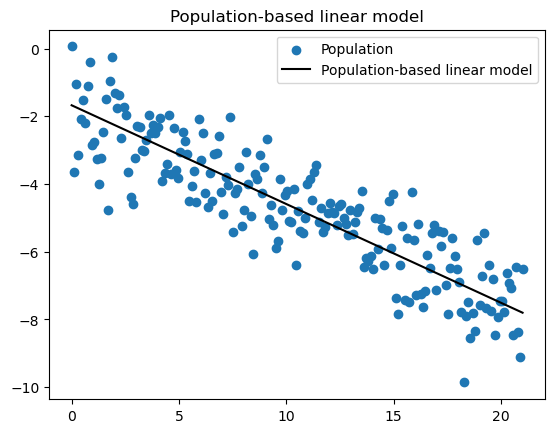

In [9]:
# Model graphing 
plt.scatter(X, y, label = "Population")
plt.plot(X, lm, label="Population-based linear model", color="black")
plt.legend()
plt.title("Population-based linear model")
plt.show()

### Population sampling

In [10]:
# Number of samples
n_samples = 1000
sampling_values = list()
for i in range(n_samples):
    # Sample generation.
    X_sample, y_sample = generate_sample(min_x, max_x, b_1, b_0)
    # Fitting the models.
    b_1_est, b_0_est = fit_linear_model(X_sample, y_sample)
    # Saving the results.
    sampling_values.append([X_sample, y_sample, b_1_est, b_0_est])

### Checking that the OLS estimators have no bias.

In [11]:
# Generation of b_0 and b_1 lists.
b_1_ests = list()
b_0_ests = list()
for sampling_value in sampling_values:
    b_1_ests.append(sampling_value[-2])
    b_0_ests.append(sampling_value[-1])
# Get means.
b_1_mean = np.array(b_1_ests).mean()
b_0_mean = np.array(b_0_ests).mean()
# Checking if b_1_mean is close to b_1.
assert np.isclose(b_1_mean, b_1, atol = 1e-1), f'Error: mean of b_1 estimators ({b_1_mean:.2f}) is not close to b_1 ({b_1:.2f})'
print(f'Mean of b_1 estimators ({b_1_mean:.2f}) is close to b_1 ({b_1:.2f})')
# Checking if b_0_mean is close to b_0.
assert np.isclose(b_0_mean, b_0, atol = 1e-1), f'Error: mean of b_0 estimators ({b_0_mean:.2f}) is not close to b_0 ({b_0:.2f})'
print(f'Mean of b_0 estimators ({b_0_mean:.2f}) is close to b_0 ({b_0:.2f})')

Mean of b_1 estimators (-0.29) is close to b_1 (-0.29)
Mean of b_0 estimators (-1.66) is close to b_0 (-1.67)


### Plotting the histograms of the OLS estimators.

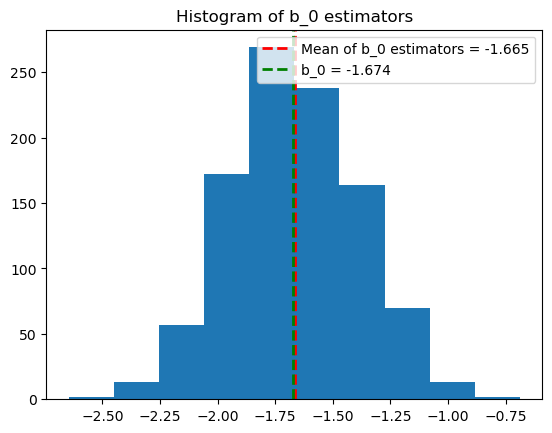

In [12]:
# Histogram of b_0 estimators.
plt.hist(b_0_ests)
plt.title("Histogram of b_0 estimators")
plt.axvline(b_0_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean of b_0 estimators = {b_0_mean:.3f}')
plt.axvline(b_0, color='green', linestyle='dashed', linewidth=2, label=f'b_0 = {b_0:.3f}')
plt.legend()

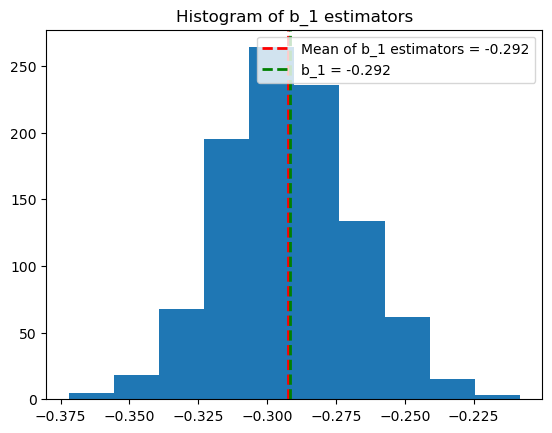

In [13]:
# Histogram of b_1 estimators.
plt.hist(b_1_ests)
plt.title("Histogram of b_1 estimators")
plt.axvline(b_1_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean of b_1 estimators = {b_1_mean:.3f}')
plt.axvline(b_1, color='green', linestyle='dashed', linewidth=2, label=f'b_1 = {b_1:.3f}')
plt.legend()

### Verifying that the variances of the OLS estimators are close to their theoretical values.

In [14]:
# Getting variance of estimators.
b_0_var = np.array(b_0_ests).var()
b_1_var = np.array(b_1_ests).var()
# Lists inicialization.
vars_b1 = list()
vars_b0 = list()
for iteration_value in sampling_values:
    # Getting y predictions.
    y_pred = linear_model(iteration_value[2], iteration_value[3], iteration_value[0])
    # Getting residuals.
    residuals = iteration_value[1] - y_pred
    # Getting SSR.
    ssr = np.sum(residuals ** 2)
    # Getting SST_X.
    X_mean = np.mean(iteration_value[0])
    sst_X = np.sum((iteration_value[0] - X_mean) ** 2)
    # Getting var estimator .
    var_est = ssr / (len(residuals) - 2)
    # Adding expected values.
    vars_b1.append(var_est / sst_X)
    vars_b0.append(var_est / (len(residuals) * sst_X) * np.sum(iteration_value[0] ** 2))
# Getting means of var estimators. 
mean_var_b1 = np.mean(vars_b1)
mean_var_b0 = np.mean(vars_b0)
# Print of the results.
print(f'The variance of b_0 is: {b_0_var:.3f}, while estimators\' means are: {mean_var_b0:.3f}')
print(f'The variance of b_1 is: {b_1_var:.3f}, while estimators\' means are: {mean_var_b1:.3f}')

The variance of b_0 is: 0.077, while estimators' means are: 0.075
The variance of b_1 is: 0.001, while estimators' means are: 0.001
